In [1]:
TRAIN_PATH = "/content/drive/MyDrive/CovidDataset/Train" 
VAL_PATH = "/content/drive/MyDrive/CovidDataset/Val"

In [5]:
#Some Basic Imports

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense,Input
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree
np.random.seed(123)

import urllib, os
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

from sklearn.preprocessing import LabelBinarizer
import glob
import cv2
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K
from keras.models import Sequential, Model
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, Input, concatenate

from sklearn.model_selection import train_test_split
# from keras.optimizers import Adam, RMSprop
from tensorflow.keras.optimizers import Adam, RMSprop
import argparse
import locale
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import itertools
from keras import regularizers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.models import load_model
import matplotlib.pyplot as plt #For Visualization
import numpy as np              #For handling arrays
import pandas as pd             # For handling data
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices: tf.config.experimental.set_memory_growth(device, True)

In [7]:
img_height,img_width = 224,224 
num_classes = 2

base_model = applications.xception.Xception(weights= None, include_top=False, input_shape= (img_height,img_width,3))

In [8]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64)(x)
x = Dense(64)(x)
predictions = Dense(1, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early = EarlyStopping(monitor="val_loss", mode="min", patience=4)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 3, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [11]:
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="binary_crossentropy", metrics=['acc'], optimizer=opt)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
from keras.preprocessing import image

In [14]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/CovidDataset/Train',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'binary'
)

Found 352 images belonging to 2 classes.


In [16]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [17]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/CovidDataset/Val',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'binary'
)

Found 40 images belonging to 2 classes.


In [18]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=50,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
8/8 [==============================] - 42s 3s/step - loss: 0.7302 - acc: 0.5781 - val_loss: 0.6933 - val_acc: 0.5312
Epoch 2/50
8/8 [==============================] - 15s 2s/step - loss: 0.1399 - acc: 0.5156 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 3/50
8/8 [==============================] - 15s 2s/step - loss: 0.1960 - acc: 0.5078 - val_loss: 0.6948 - val_acc: 0.5312
Epoch 4/50
8/8 [==============================] - 14s 2s/step - loss: 0.2164 - acc: 0.4688 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 5/50
8/8 [==============================] - 10s 1s/step - loss: 0.0660 - acc: 0.5000 - val_loss: 0.6958 - val_acc: 0.5312
Epoch 6/50
8/8 [==============================] - 9s 1s/step - loss: 0.2123 - acc: 0.4922 - val_loss: 0.6951 - val_acc: 0.5312
Epoch 7/50
8/8 [==============================] - 9s 1s/step - loss: 0.1041 - acc: 0.4062 - val_loss: 0.6968 - val_acc: 0.5312
Epoch 8/50
8/8 [==============================] - 8s 1s/step - loss: 0.0669 - acc: 0.4766 - val_loss: 0.69

In [19]:
# Loss is very high

model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[2.3248002529144287, 0.5]

In [20]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[2.2995383739471436, 0.5]

In [23]:
trainImagesX = '/content/drive/MyDrive/CovidDataset/Train/Covid'
trainImagesY = '/content/drive/MyDrive/CovidDataset/Train/Normal'

testImagesX = '/content/drive/MyDrive/CovidDataset/Val/Covid'
testImagesY = '/content/drive/MyDrive/CovidDataset/Val/Normal'

In [27]:
def cnn_evaluation(model, history, train_images, train_labels, test_images, test_labels, class_names, model_name=None):
    """
    Evaluates the performance of a CNN with loss and accuracy plots, a confusion matrix and a classification report for the training and test sets.
    """
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epch = range(1, len(train_acc) + 1)
    plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
    plt.plot(epch, val_acc, 'g', label='Validation acc')
    plt.title('Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epch, train_loss, 'r.', label='Training loss')
    plt.plot(epch, val_loss, 'r', label='Validation loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

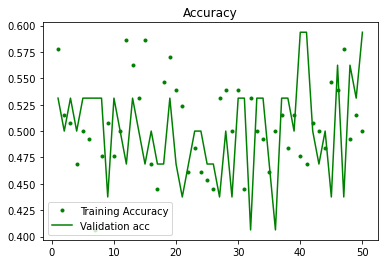

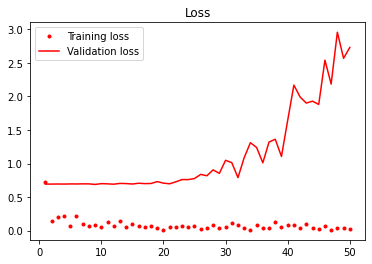

In [28]:
cnn_evaluation(model, hist, trainImagesX, trainImagesY, testImagesX, testImagesY, class_names=['covid', 'no findings'])

In [29]:
# Test Images

y_actual = []
y_test = []

In [30]:
for i in os.listdir("/content/drive/MyDrive/CovidDataset/Val/Normal/"):
  img = image.load_img("/content/drive/MyDrive/CovidDataset/Val/Normal/"+i, target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  classes_x=np.argmax(p, axis=1)
  y_test.append(p[0, 0])
  y_actual.append(1)

In [31]:
for i in os.listdir("/content/drive/MyDrive/CovidDataset/Val/Covid/"):
  img = image.load_img("/content/drive/MyDrive/CovidDataset/Val/Covid/"+i, target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  classes_x=np.argmax(p, axis=1)
  y_test.append(p[0, 0])
  y_actual.append(0)

In [32]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [33]:
y_actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
y_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.], dtype=float32)

In [35]:
cm = confusion_matrix(y_actual, y_test)

In [37]:
import seaborn as sns

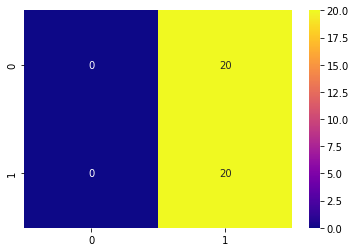

In [38]:
sns.heatmap(cm, cmap="plasma", annot=True)

In [43]:
model.save("/content/drive/MyDrive/Major Project Models/Xception_Model.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
